In [60]:
from dotenv import load_dotenv

load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=1)

In [ ]:
from pydantic import BaseModel, Field
from langchain_google_genai import GoogleGenerativeAI
from typing import List, Optional, TypedDict

class ParentState(TypedDict):
    topic: str
    story: str

class SubState(TypedDict):
    story: str
    summary: list[str]

def generate_story(state: ParentState) -> ParentState:
    system_prompt = """
    You are a storyteller.
    Generate a story about the given {topic}.
    """
    response = llm.invoke(system_prompt.format(topic=state["topic"]))
    return {"story": response.content}

class Summary(BaseModel):
    summary: list[str] = Field(description="A list of sentences that summarize the story")

def generate_summary(state: SubState) -> SubState:
    structured_output = llm.with_structured_output(Summary)
    system_prompt = """
    You are a good summary writer.
    Generate a summary of the given story:
    <story>
    {story}
    </story>
    """
    response = structured_output.invoke(system_prompt.format(story=state["story"]))
    return {"summary": response.summary}

def print_summary(state: SubState) -> SubState:
    print(state["summary"])


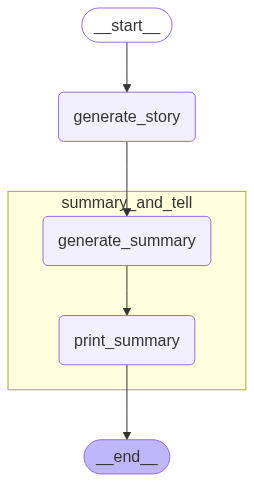

In [89]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

subGraphBuilder = StateGraph(SubState)

subGraphBuilder.add_node("generate_summary", generate_summary)
subGraphBuilder.add_node("print_summary", print_summary)
subGraphBuilder.add_edge(START, "generate_summary")
subGraphBuilder.add_edge("generate_summary", "print_summary")
subGraphBuilder.add_edge("generate_summary", END)

graphBuilder = StateGraph(ParentState)

graphBuilder.add_node("generate_story", generate_story)
graphBuilder.add_node("summary_and_tell", subGraphBuilder.compile())

graphBuilder.add_edge(START, "generate_story")
graphBuilder.add_edge("generate_story", "summary_and_tell")
graphBuilder.add_edge("summary_and_tell", END)

graph = graphBuilder.compile()
# display the graph in image
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))


In [ ]:
# stream the output of the graph
for event in graph.stream({"topic": "cat and dog"}, stream_mode="messages", subgraphs=True):
    print(event)

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
('summary_and_tell:14488dc7-a995-87a1-2d84-e0799cb13c3f',)
["Willow, an elegant and aloof cat, and Gus, a boisterous Golden Retriever, initially had a strained relationship marked by Willow's disdain and Gus's bewildered optimism.", 'Their dynamic shifted dramatically during a severe summer storm when both animals were terrified.', 'Willow, startled, sought shelter under the same sofa where a whimpering Gus was hiding, leading to an unexpected moment of shared vulnerability.', "Instead of their usual antagonism, Willow leaned into Gus's comforting presence, and Gus found reassurance in the small cat beside him, their fears dissolving the wall between them.", "From that day forward, their bond transformed from wary distance to a quiet understanding, with Willow occasionally tolerating Gus's closeness and Gus approaching her with gentle care.", 'Their unique friendship became a testament that connection can be forged in share